# Ali Allahverdi
# 9713114060

# importing liberes


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Setup style of charts
plt.style.use('seaborn')

## read and show head


In [2]:
df = pd.read_csv('WHO-COVID-19.csv', parse_dates=['Date_reported'], index_col='Date_reported')
df.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
2020-01-04,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
2020-01-05,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
2020-01-06,IR,Iran (Islamic Republic of),EMRO,0,0,0,0
2020-01-07,IR,Iran (Islamic Republic of),EMRO,0,0,0,0


In [3]:
df.shape


(2187, 7)

# add cloums we need


In [4]:
df.drop(columns=['Country_code', 'WHO_region', 'Cumulative_cases', 'Cumulative_deaths'], inplace=True)
df.head()

,Country,New_cases,New_deaths
Date_reported,,,
2020-01-03,Iran (Islamic Republic of),0,0
2020-01-04,Iran (Islamic Republic of),0,0
2020-01-05,Iran (Islamic Republic of),0,0
2020-01-06,Iran (Islamic Republic of),0,0
2020-01-07,Iran (Islamic Republic of),0,0


### Group by countries then resampling date per month.

In [5]:
gdf = df.groupby(['Country']).resample('M')
gdf = gdf.mean()
gdf

New_cases  New_deaths
Country     Date_reported                         
Afghanistan 2020-01-31        0.000000    0.000000
            2020-02-29        0.172414    0.000000
            2020-03-31        5.193548    0.129032
            2020-04-30       55.366667    1.866667
            2020-05-31      430.741935    6.258065
...                                ...         ...
Iraq        2021-08-31     8542.870968   69.967742
            2021-09-30     3988.533333   48.566667
            2021-10-31     1720.419355   29.580645
            2021-11-30      874.866667   22.300000
            2021-12-31      418.967742   11.193548

[72 rows x 2 columns]

## Plot average of new case and new death

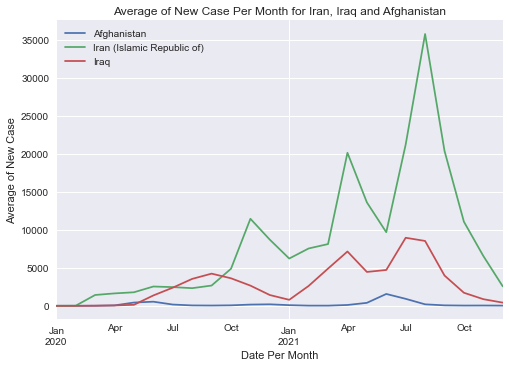

In [6]:
ax = gdf.unstack(level=0)['New_cases'].plot()
plt.xlabel("Date Per Month")
plt.ylabel("Average of New Case")
plt.title("Average of New Case Per Month for Iran, Iraq and Afghanistan", fontsize=12)
plt.legend()


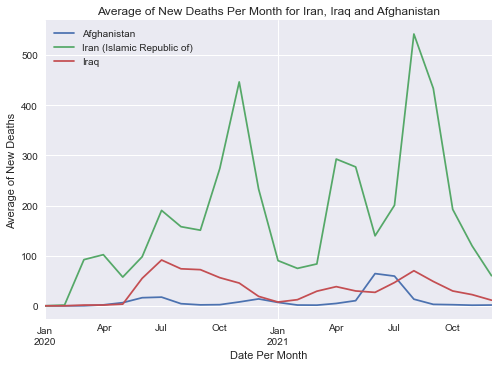

In [7]:
ax = gdf.unstack(level=0)['New_deaths'].plot()
plt.xlabel("Date Per Month")
plt.ylabel("Average of New Deaths")
plt.title("Average of New Deaths Per Month for Iran, Iraq and Afghanistan", fontsize=12)
plt.legend()